# Joe Stanley
### ECE 524 - HWK2

## Problem 1
(Analytical Operations)

Reduce the circuit to a simple RLC system.

In [1]:
# Import Necessary Libraries
import numpy as np
import matplotlib.pyplot as plt
import eepower as eep
from eepower import u, m, k, M

In [2]:
# Define Givens

# Per-Unit Bases
Sbase = 30*M
Vb1 = 138*k
Vb2 = 13.8*k
Vb3 = 4.16*k

# Source
S_src = 3500*M #VA
XR_src = 15 #unitless
V_src = 138*k #V

# Transformer(s)
S_xfm = 30*M #VA
Z_xfm = 7.5/100 #pu
XR_xfm = 18.6 #unitless
V_busA = 13.8*k #V

# Generator
S_gen = 35.3*M #VA
Xdv_gen = 10/100 #pu
XR_gen = 48 #unitless

# Motor Load (each motor)
P_mot = 30000 #hp
Xd_mot = 16.7/100 #pu
XR_mot = 10 #unitless
pf_mot = 0.8 #lagging

# Cap Bank
S_cap = 10*M #VAr

# Load Transformer
S_xfm_ld = 5*M #VA
Z_xfm_ld = 5.5/100 #pu
XR_xfm_ld = 7 #unitless
V_ld = 4.16*k #V

In [3]:
# Define Formulas, Algorithms, and Functions

# Define Impedance From Power and X/R
def zsource(S,V,XoverR,Sbase=None,Vbase=None):
    """
    zsource Function
    
    Used to calculate the source impedance given the apparent power
    magnitude and the X/R ratio.
    
    Parameters
    ----------
    S:          float
                The (rated) apparent power magnitude of the source.
                This may also be refferred to as the "Short-Circuit MVA"
    V:          float
                The (rated) voltage of the source terminals.
    XoverR:     float
                The X/R ratio rated for the source.
    Sbase:      float, optional
                The per-unit base for the apparent power. If set to
                None, will automatically force Sbase to equal S.
                If set to True will treat S as the per-unit value.
    Vbase:      float, optional
                The per-unit base for the terminal voltage. If set to
                None, will automaticlaly force Vbase to equal V. If
                set to True, will treat V as the per-unit value.
    
    Returns
    -------
    Zsource_pu: complex
                The per-unit evaluation of the source impedance.
    """
    # Force Sbase and Vbase if needed
    if Vbase == None:
        Vbase = V
    if Sbase == None:
        Sbase = S
    # Prevent scaling if per-unit already applied
    if Vbase == True:
        Vbase = 1
    if Sbase == True:
        Sbase = 1
    # Set to per-unit
    Spu = S/Sbase
    Vpu = V/Vbase
    # Evaluate Zsource Magnitude
    Zsource_pu = Vpu**2/Spu
    # Evaluate the angle
    nu = np.degrees(np.arctan(XoverR))
    Zsource_pu = eep.phasor(Zsource_pu, nu)
    return(Zsource_pu)

# Define Impedance Decomposer
def zdecompose(Zmag,XoverR):
    """
    zdecompose Function
    
    A function to decompose the impedance magnitude into its
    corresponding resistance and reactance using the X/R ratio.
    
    It is possible to "neglect" R, or make it a very small number;
    this is done by setting the X/R ratio to a very large number
    (X being much larger than R).
    
    Parameters
    ----------
    Zmag:       float
                The magnitude of the impedance.
    XoverR:     float
                The X/R ratio.
    
    Returns
    -------
    R:          float
                The resistance (in ohms)
    X:          float
                The reactance (in ohms)
    """
    # Evaluate Resistance
    R = Zmag/np.sqrt(XoverR**2+1)
    # Evaluate Reactance
    X = R * XoverR
    # Return
    return(R,X)

# Define HP to Watts Calculation
def watts(hp):
    """
    watts Formula
    
    Calculates the power (in watts) given the
    horsepower.
    
    Parameters
    ----------
    hp:         float
                The horspower to compute.
    
    Returns
    watts:      float
                The power in watts.
    """
    return(hp * 745.699872)

# Define Apparent Power to Farad Conversion
def farads(VAR,V,freq=60):
    """
    farads Formula
    
    Function to calculate the required capacitance
    in Farads to provide the desired power rating
    (VARs).
    
    Parameters
    ----------
    VAR:        float
                The rated power to meet.
    V:          float
                The voltage across the capacitor;
                not described as VLL or VLN, merely
                the capacitor voltage.
    freq:       float, optional
                The System frequency
    
    Returns
    -------
    C:          float
                The evaluated capacitance (in Farads).
    """
    return(VAR / (2*np.pi*freq*V**2))

# Define Power Reactance Calculator
def powerimpedance(S,V,parallel=False):
    """
    powerreactance Function
    
    Function to determine the ohmic resistance/reactance
    (impedance) represented by the apparent power (S).
    
    Formula:    Z = V^2 / S           (series components)
                Z = V^2 / (3*S)       (parallel components)
    
    Parameters
    ----------
    S:          complex
                The apparent power of the passive element,
                may be purely resistive or purely reactive.
    V:          float
                The operating voltage of the passive element.
    parallel:   bool, optional
                Control point to specify whether the ohmic
                impedance should be returned as series components
                (False opt.) or parallel components (True opt.).
    
    Returns
    -------
    R:          float
                The ohmic resistance required to consume the
                specified apparent power (S) at the rated
                voltage (V).
    X:          float
                The ohmic reactance required to consume the
                specified apparent power (S) at the rated
                voltage (V).
    """
    # Condition Inputs
    V = abs(V)
    # Test for Parallel Component Option and Evaluate
    if isinstance(S,complex):
        # Complex Power (both R and X)
        if parallel:
            R = V**2 / (3*S.real)
            X = V**2 / (3*S.imag)
        else:
            R = V**2 / (S.real)
            X = V**2 / (S.imag)
        return( R, X )
    # Not Complex (just R)
    R = V**2 / S
    return( R )

In [4]:
# Evaluate Impedance Terms

# Source
Zsrc_pu = zsource(S_src,V_src,XR_src,Sbase,Vb1)
print("Source Impedance:",np.around(Zsrc_pu,4),"pu-ohms")

# Generator
Rgen = Xdv_gen/XR_gen
Zgen = Rgen + 1j*Xdv_gen
Zgen = eep.convert(Zgen,eep.zpu(35.3*M,VLL=13.8*k),eep.zpu(30*M,VLL=13.8*k))
print("Generator Impedance:",np.around(Zgen,4),"pu-ohms")

# Transformer
Rxfm,Xxfm = zdecompose(Z_xfm,XR_xfm)
Zxfm = Rxfm + 1j*Xxfm
print("Transformer Impedance:",np.around(Zxfm,4),"pu-ohms")

Source Impedance: (0.0006+0.0086j) pu-ohms
Generator Impedance: (0.0018+0.085j) pu-ohms
Transformer Impedance: (0.004+0.0749j) pu-ohms


In [5]:
# Base Impedance
Zbase = eep.zpu(Sbase,Vb2)

# Combine impedances into Zeq
Zeq_src = eep.parallelz((Zxfm,Zxfm))+Zsrc_pu
print("Source Zeq:",eep.reactance(Zeq_src*Zbase),"(Ω, H)")
print("Generator Z:",eep.reactance(Zgen*Zbase),"(Ω, H)")
#         Parallel(       Parallel( Trans1, Trans2)+Source, Generator )
Zeq_pu = eep.parallelz((Zeq_src,Zgen))

# Return to actual impedance (in ohms)
Zeq = Zeq_pu*Zbase
print("Thevenin RLC:",Zeq,"Ω")
print("Thevenin RLC:",eep.reactance(Zeq),"(Ω, H)")

# Demonstrate LC system, Neglecting R
print("Thevenin LC:",Zeq.imag,"ohms")
print("Thevenin LC:",eep.reactance(Zeq.imag*1j),"H")

Source Zeq: (0.01639932457188166, 0.00077576832486166657) (Ω, H)
Generator Z: (0.011239376770538243, 0.0014313524185196062) (Ω, H)
Thevenin RLC: (0.00828798310752+0.189509201181j) Ω
Thevenin RLC: (0.0082879831075199639, 0.00050316927478757543) (Ω, H)
Thevenin LC: 0.189509201181 ohms
Thevenin LC: 0.000502688768822 H


In [6]:
# Evaluate Motor Systems

# Find wattage of motor
P_mtr = watts(P_mot)
print("Motor Power:",P_mtr/M,"MW")
S_mtr = P_mtr/pf_mot
Q_mtr = np.sqrt(S_mtr**2 - P_mtr**2)
print("Motor Apparent Power:",S_mtr/M,"MVA")

# Find Impedance
R_mtr = powerimpedance(P_mtr,Vb2)
XL_mtr = powerimpedance(Q_mtr,Vb2)
X_mtr = eep.reactance(XL_mtr)
print("Motor Resistance:",R_mtr,"Ω")
print("Motor Inductace:",X_mtr*k,"mH")

# Calculate Current Magnitude
Imag_mtr = S_mtr/Vb2
print("Motor Current:",Imag_mtr,"A (each)")

# Evaluate Motor's Internal Voltage
# Use basic ohm's law
V_bus = 13.8*k
XL = X_mtr * Zbase
Vmtr = V_bus - XL*Imag_mtr
print("Motor Internal Voltage:",Vmtr,"V")

Motor Power: 22.37099616 MW
Motor Apparent Power: 27.963745199999998 MVA
Motor Resistance: 8.51280821998049 Ω
Motor Inductace: 30.1079001734 mH
Motor Current: 2026.3583478260869 A (each)
Motor Internal Voltage: 13412.7123615 V


In [7]:
# Evaluate Non-Linear Load

# Transformer
Rxfm,Xxfm = zdecompose(Z_xfm_ld,XR_xfm_ld)
Zxfm_ld = Rxfm + 1j*Xxfm
Zxfm_ld *= Zbase
print("Load Transformer Impedance:",Zxfm_ld,"Ω")
print("Load Transformer Inductance:",eep.reactance(Zxfm_ld.imag)*k,"mH")

# Find Current
P_nll = 4.5*M
I_nll = P_nll / Vb2
print("Non-Linear Load Current Mag.:",I_nll,"A")

# Find Resistance
R_nll = Vb2 / I_nll
print("Non-Linear Load Resistance:",R_nll,"Ω")

Load Transformer Impedance: (0.0493758523167+0.345630966217j) Ω
Load Transformer Inductance: 0.916814612651 mH
Non-Linear Load Current Mag.: 326.0869565217391 A
Non-Linear Load Resistance: 42.32 Ω


In [8]:
# Determine Cap-Bank Capacitance in Farads
Vcap = 13.8*k
print("Voltage Across one Capacitor (Line-Neutral):",Vcap,"V")
print("Cap-Bank Value:",farads(10*M,Vcap)*1e6,"µF")

Voltage Across one Capacitor (Line-Neutral): 13800.0 V
Cap-Bank Value: 139.28703974295962 µF


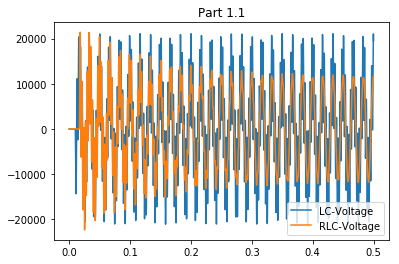

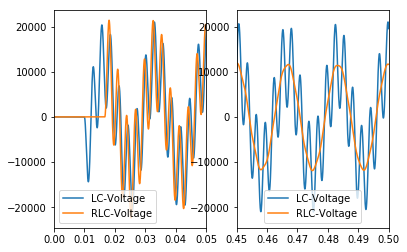

In [9]:
# Load Data from File for Part A
data = np.genfromtxt("PartA_data.ADF",delimiter='\t',skip_header=2,usecols=(0,1,2),unpack=True)
t_arr, LC_V, RLC_V = data

# Plot Data
plt.plot(t_arr,LC_V,label="LC-Voltage")
plt.plot(t_arr,RLC_V,label="RLC-Voltage")
plt.legend()
plt.title("Part 1.1")
plt.show()

# Plot Data
plt.subplot(1,2,1)
plt.plot(t_arr,LC_V,label="LC-Voltage")
plt.plot(t_arr,RLC_V,label="RLC-Voltage")
plt.legend()
plt.xlim(0,0.05)
plt.subplot(1,2,2)
plt.plot(t_arr,LC_V,label="LC-Voltage")
plt.plot(t_arr,RLC_V,label="RLC-Voltage")
plt.legend()
plt.xlim(0.45,0.5)
plt.show()

**Remarks:**

It is interesting to note that the voltage of th RLC simplified circuit shows an exponential decay towards the steady state. This is quite the expected behavior, as it makes sense that the resistor would damp out the voltage.

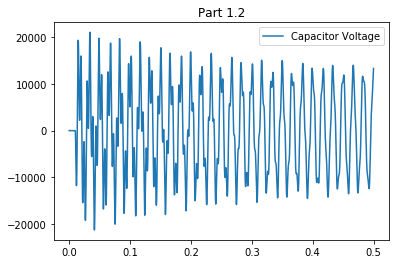

In [10]:
# Load Data from File for Part B
data = np.genfromtxt("PartB_data.ADF",delimiter='\t',skip_header=2,usecols=(0,1),unpack=True)
t_arr, VCAP = data

# Plot Data
plt.plot(t_arr,VCAP,label="Capacitor Voltage")
plt.legend()
plt.title("Part 1.2")
plt.show()

**Remarks**

It is worth noting that this graph shows remarkable resemblance to those shown previously.

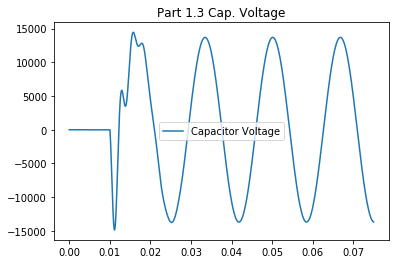

In [11]:
# Load Data from File for Part C
data = np.genfromtxt("PartC_data.ADF",delimiter='\t',skip_header=2,usecols=(0,1),unpack=True)
t_arr, VCAP_c= data

# Plot Data
plt.plot(t_arr,VCAP_c,label="Capacitor Voltage")
plt.legend()
plt.title("Part 1.3 Cap. Voltage")
plt.show()

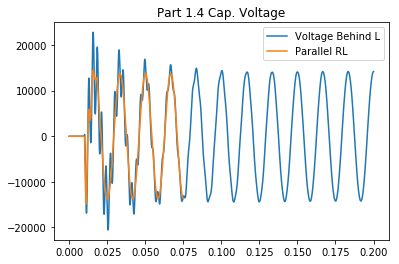

In [12]:
# Load Data from File for Part D
data = np.genfromtxt("PartD_data.ADF",delimiter='\t',skip_header=2,usecols=(0,1),unpack=True)
t_d, VCAP_d= data

# Plot Data
plt.plot(t_d,VCAP_d,label="Voltage Behind L")
plt.plot(t_arr,VCAP_c,label="Parallel RL")
plt.legend()
plt.title("Part 1.4 Cap. Voltage")
plt.show()

**Remarks**

Note here that the RL model seems to provide a remarkable ammount of damping. It is likely not very accurate as the internal voltage of the motors will drive the system just like an additional source of generation. Thus the RL model is likely invalid.

## Problem 2:

Repeat Problem 1 (anaylys and modeling of parts 1 and 4) with the bus circuit breaker open.

In [13]:
# Evaluate RLC System

# Base impedance remains unaltered
# Zsrc_pu
# Zgen
# Zxfm

# Evaluate the simplified EQ impedance
Zeq = eep.parallelz((Zsrc_pu+Zxfm),Zgen) * Zbase
print("Equivalent Circuit Impedance:",Zeq,"Ω")
print("Zeq Elements:",eep.reactance(Zeq),"(Ω, H)")

Equivalent Circuit Impedance: (0.0101846423212+0.267354486306j) Ω
Zeq Elements: (0.010184642321227273, 0.00070969418257827517) (Ω, H)


In [14]:
# Display Available Impedances

print("Source Impedance:",eep.reactance(Zsrc_pu*Zbase),"(Ω, H)")
print("Transformer Impedance:",eep.reactance(Zxfm*Zbase),"(Ω, H)")
print("Generator Z:",eep.reactance(Zgen*Zbase),"(Ω, H)")

Source Impedance: (0.0036193943897564313, 0.00014433079696390735) (Ω, H)
Transformer Impedance: (0.025559860364250453, 0.0012628944734341895) (Ω, H)
Generator Z: (0.011239376770538243, 0.0014313524185196062) (Ω, H)


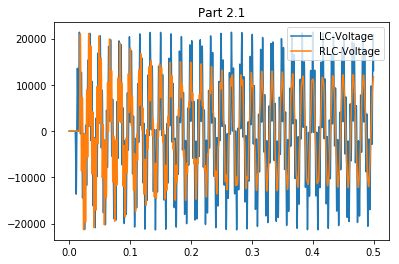

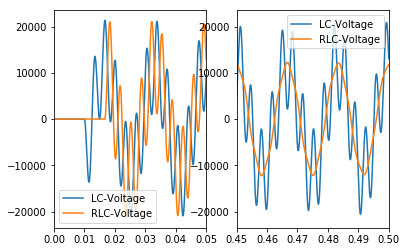

In [15]:
# Load Data from File for Part A
data = np.genfromtxt("PartAA_data.ADF",delimiter='\t',skip_header=2,usecols=(0,1,2),unpack=True)
t_arr, LC_V, RLC_V = data

# Plot Data
plt.plot(t_arr,LC_V,label="LC-Voltage")
plt.plot(t_arr,RLC_V,label="RLC-Voltage")
plt.legend()
plt.title("Part 2.1")
plt.show()

# Plot Data
plt.subplot(1,2,1)
plt.plot(t_arr,LC_V,label="LC-Voltage")
plt.plot(t_arr,RLC_V,label="RLC-Voltage")
plt.legend()
plt.xlim(0,0.05)
plt.subplot(1,2,2)
plt.plot(t_arr,LC_V,label="LC-Voltage")
plt.plot(t_arr,RLC_V,label="RLC-Voltage")
plt.legend()
plt.xlim(0.45,0.5)
plt.show()

**Remarks**

Note here that there is only a slight difference from the view shown earlier where the breaker was closed. This is just due to a change in the equivalent Thevenin circuit which has caused a difference in the system impedance (and thus the available fault current).

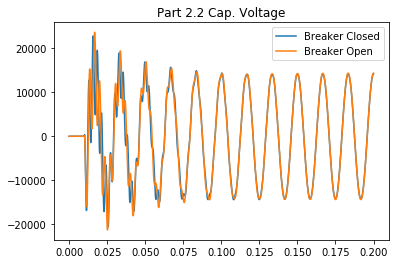

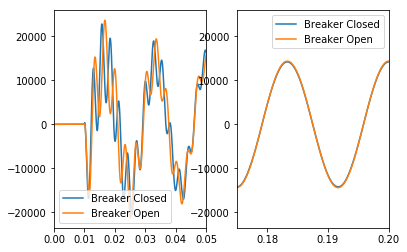

In [16]:
# Plot Data From Previous
plt.plot(t_d,VCAP_d,label="Breaker Closed")

# Load New Data from File
data = np.genfromtxt("PartDD_data.ADF",delimiter='\t',skip_header=2,usecols=(0,1),unpack=True)
t_arr, VCAP= data

# Plot Data
plt.plot(t_arr,VCAP,label="Breaker Open")
plt.legend()
plt.title("Part 2.2 Cap. Voltage")
plt.show()

# Plot Data
plt.subplot(1,2,1)
plt.plot(t_d,VCAP_d,label="Breaker Closed")
plt.plot(t_arr,VCAP,label="Breaker Open")
plt.legend()
plt.xlim(0,0.05)
plt.subplot(1,2,2)
plt.plot(t_d,VCAP_d,label="Breaker Closed")
plt.plot(t_arr,VCAP,label="Breaker Open")
plt.legend()
plt.xlim(0.175,0.2)
plt.show()

**Remarks**

Note here that there are some subtle differences between the breaker-open and breaker-closed systems. Of course, this is due to the fact that the thevenen circuit will be vastly different based upon the state of the breaker. It is worth noting that although both circuits show some differences in the transient state, they both converge to a like steady state.